# Sleep Health and Digital Screen Exposure Datasets Analysis
**Datasets:** https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset

Copyright 2025 Fajar Laksono, a practice purpose

Github: http://fajarlaksono.github.io/

## Analysis Plan

1. Exploratory Data Analysis
    - Understanding the data sets
    - Checking missing values
    - Checking duplicates
    - Understanding Trendliness
    - Understanding Correlation
2. Feature Engineering
    - Creating new informative feature
    - Handling multicolinearity issues
3. Data Preprocessing
    - Scaling numerical features
4. Model Selection, Training, and Evaluation
    - Training Classification Models
    - Evaluating performance with accuracy, precision, recal, andd F1-score
    - Hyperparameter tuning for optimal results 
5. Insights and Conclusion
    - key takeaways from the analysis
    - Recommendation for feature improvement

## Import Libraries

In [ ]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set this to the number of cores you want to use

print("Kagglehub Version: " + kagglehub.__version__)


Kagglehub Version: 0.3.8


## Load and Transform

### Download datasets

In [ ]:
# Download latest version
path = kagglehub.dataset_download("arifmia/sleep-health-and-digital-screen-exposure-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\arifmia\sleep-health-and-digital-screen-exposure-dataset\versions\1


### Load datasets

In [ ]:
dry_eye_ds = pd.read_csv(os.path.join(path, "Dry_Eye_Dataset.csv"))
dry_eye_ds = pd.DataFrame(dry_eye_ds)

## Exploratory Data Analysis

### Understanding Datasets

#### Dataset Preview

In [6]:
print(dry_eye_ds.head(10))

  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   
5      F   42             5.8              3             1         117/85   
6      M   26             4.8              5             2         124/61   
7      M   33             5.5              2             1         109/85   
8      M   36             6.3              1             2         135/76   
9      M   33             7.7              4             5         140/88   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1         

#### Dataset Info

In [ ]:
print("shape: ", dry_eye_ds.shape, "\n")
print(dry_eye_ds.info())

shape:  (20000, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 

#### Summary Statistics

In [8]:
print(dry_eye_ds.describe())

                Age  Sleep duration  Sleep quality  Stress level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         Heart rate   Daily steps  Physical activity        Height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%       70.000000   6000.000000    

#### Missing Values

In [9]:
print(dry_eye_ds.isnull().sum())

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64


#### Check For Duplication

In [10]:
print('Number of duplicate rows:', dry_eye_ds.duplicated().sum())

Number of duplicate rows: 0


#### Summary

> **Conclusion:**
> 
> - the datasets doesn't represent time-series
>
> - Blood pressure needs to be splited as Syntolic and Diastolic 
>
> - Gender, Smooking, Ongoing medical, Smart device before bed are required to be encoded 
> 
> - no missing and no duplication within the data.

### Understanding Pattern and Trendliness

#### Preparation

##### Data Splitting

In [ ]:
dry_eye_ds[['Systolic', 'Diastolic']] = dry_eye_ds['Blood pressure'].str.split('/', expand=True)
dry_eye_ds['Systolic'] = pd.to_numeric(dry_eye_ds['Systolic'])
dry_eye_ds['Diastolic'] = pd.to_numeric(dry_eye_ds['Diastolic'])

dry_eye_ds.drop(columns=['Blood pressure'], inplace=True)

##### Categorical Encoding

In [ ]:
labelencoder = LabelEncoder()
categorical_columns=[
    'Gender', 
    'Smoking', 
    'Ongoing medication', 
    'Smart device before bed', 
    'Sleep disorder', 
    'Wake up during night',
    'Feel sleepy during day',
    'Caffeine consumption',
    'Alcohol consumption',
    'Blue-light filter',
    'Discomfort Eye-strain',
    'Redness in eye',
    'Itchiness/Irritation in eye',
    'Dry Eye Disease',
    'Medical issue']
for col in categorical_columns:
    dry_eye_ds[col] = labelencoder.fit_transform(dry_eye_ds[col].astype(str))

#### Review

##### Info

In [13]:
print(dry_eye_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int64  
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Heart rate                   20000 non-null  int64  
 6   Daily steps                  20000 non-null  int64  
 7   Physical activity            20000 non-null  int64  
 8   Height                       20000 non-null  int64  
 9   Weight                       20000 non-null  int64  
 10  Sleep disorder               20000 non-null  int64  
 11  Wake up during night         20000 non-null  int64  
 12  Feel sleepy during day       20000 non-null  int64  
 13  Caffeine consump

##### Describe

In [14]:
print(dry_eye_ds.describe())

             Gender           Age  Sleep duration  Sleep quality  \
count  20000.000000  20000.000000    20000.000000   20000.000000   
mean       0.501400     31.422800        6.998245       2.997250   
std        0.500011      8.103717        1.731723       1.412283   
min        0.000000     18.000000        4.000000       1.000000   
25%        0.000000     24.000000        5.500000       2.000000   
50%        1.000000     31.000000        7.000000       3.000000   
75%        1.000000     39.000000        8.500000       4.000000   
max        1.000000     45.000000       10.000000       5.000000   

       Stress level    Heart rate   Daily steps  Physical activity  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean       2.993750     79.912200  10536.900000          90.069750   
std        1.407235     11.808279   5752.729186          52.317283   
min        1.000000     60.000000   1000.000000           0.000000   
25%        2.000000     70.000000   6

##### Data Preview

In [15]:
print(dry_eye_ds.head())

   Gender  Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0       0   24             9.5              2             1          67   
1       1   39             9.6              2             3          60   
2       0   45             5.4              1             5          95   
3       0   45             5.4              4             5          78   
4       0   42             5.7              3             2          72   

   Daily steps  Physical activity  Height  Weight  ...  Ongoing medication  \
0         3000                 31     161      69  ...                   1   
1        12000                 74     164      87  ...                   1   
2        12000                 93     179      94  ...                   0   
3        19000                 32     160      77  ...                   0   
4         4000                173     179      99  ...                   0   

   Smart device before bed  Average screen time  Blue-light filter  \
0         

#### Correlation Analysis

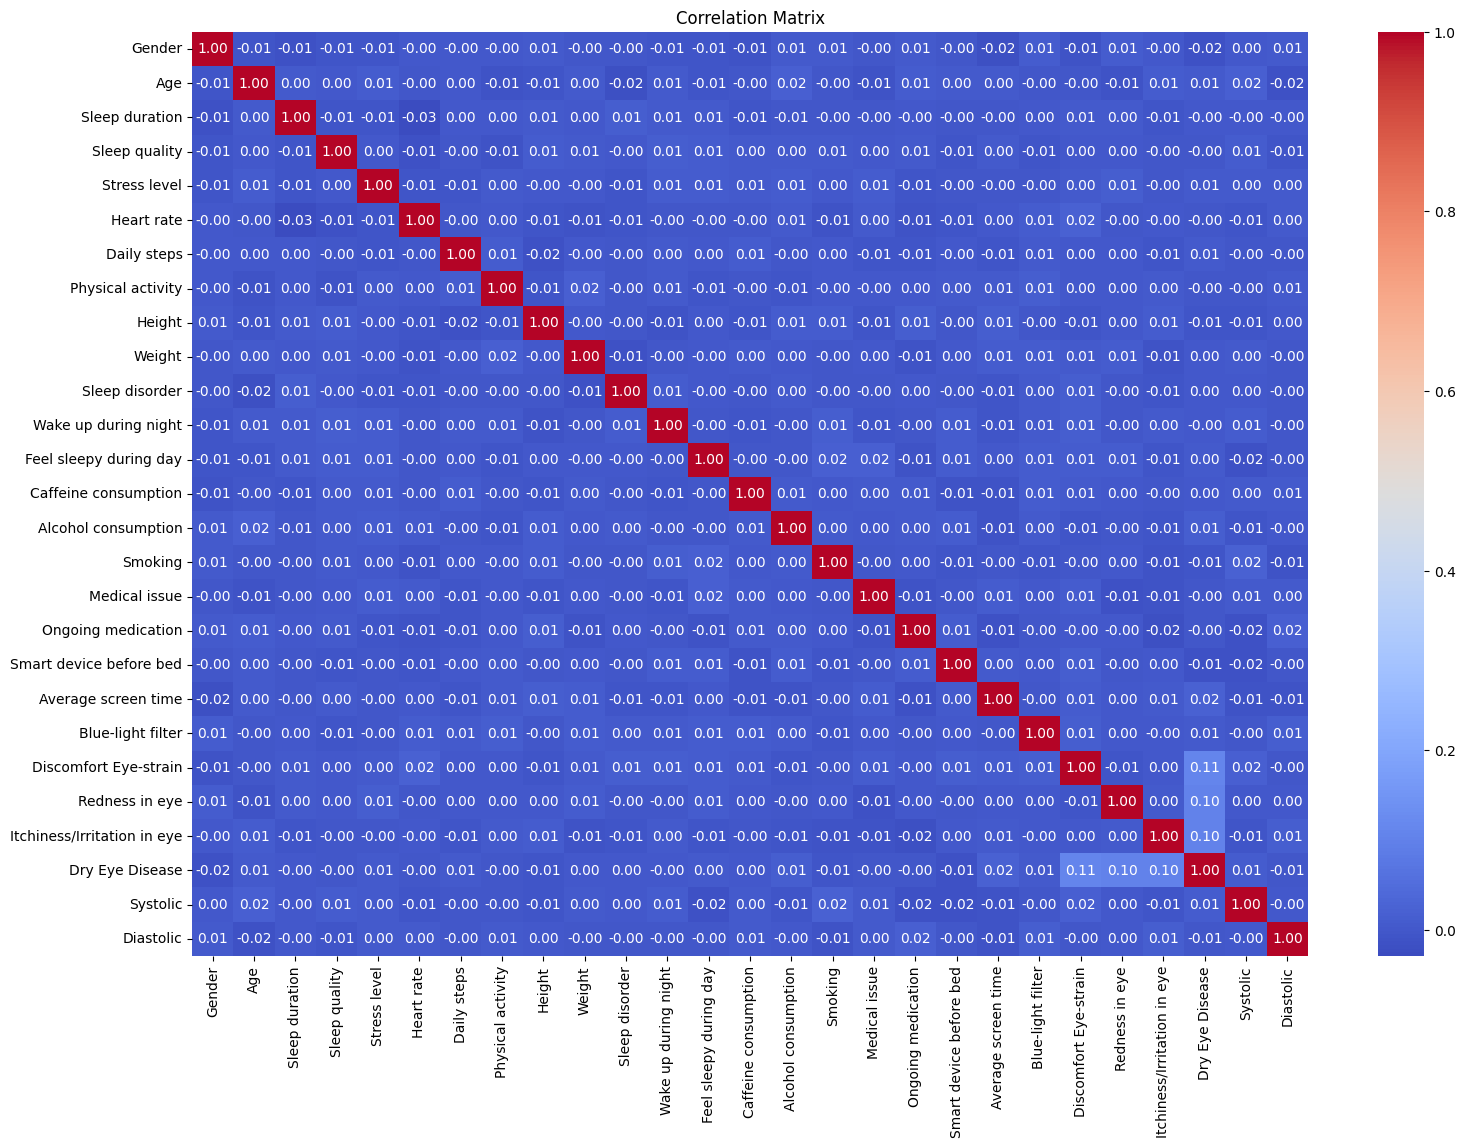

In [ ]:
# Select only numeric columns
numeric_cols = dry_eye_ds.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_cols.corr()
# upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# threshold = 0.1
# high_corr = upper_tri[(upper_tri >= threshold) | upper_tri <= - threshold]

# Generate a heatmap
plt.figure(figsize=(18, 12))
# sns.heatmap(high_corr, annot=True, fmt='.2f', cmap='coolwarm', mask=high_corr.isnull())
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> **Conclusion:**
> 
> Graph indicates that there is small ar even no linear relationship between variables.
>
> **Further Relationship/Regression analysis is not required**

#### Distribution Analysis

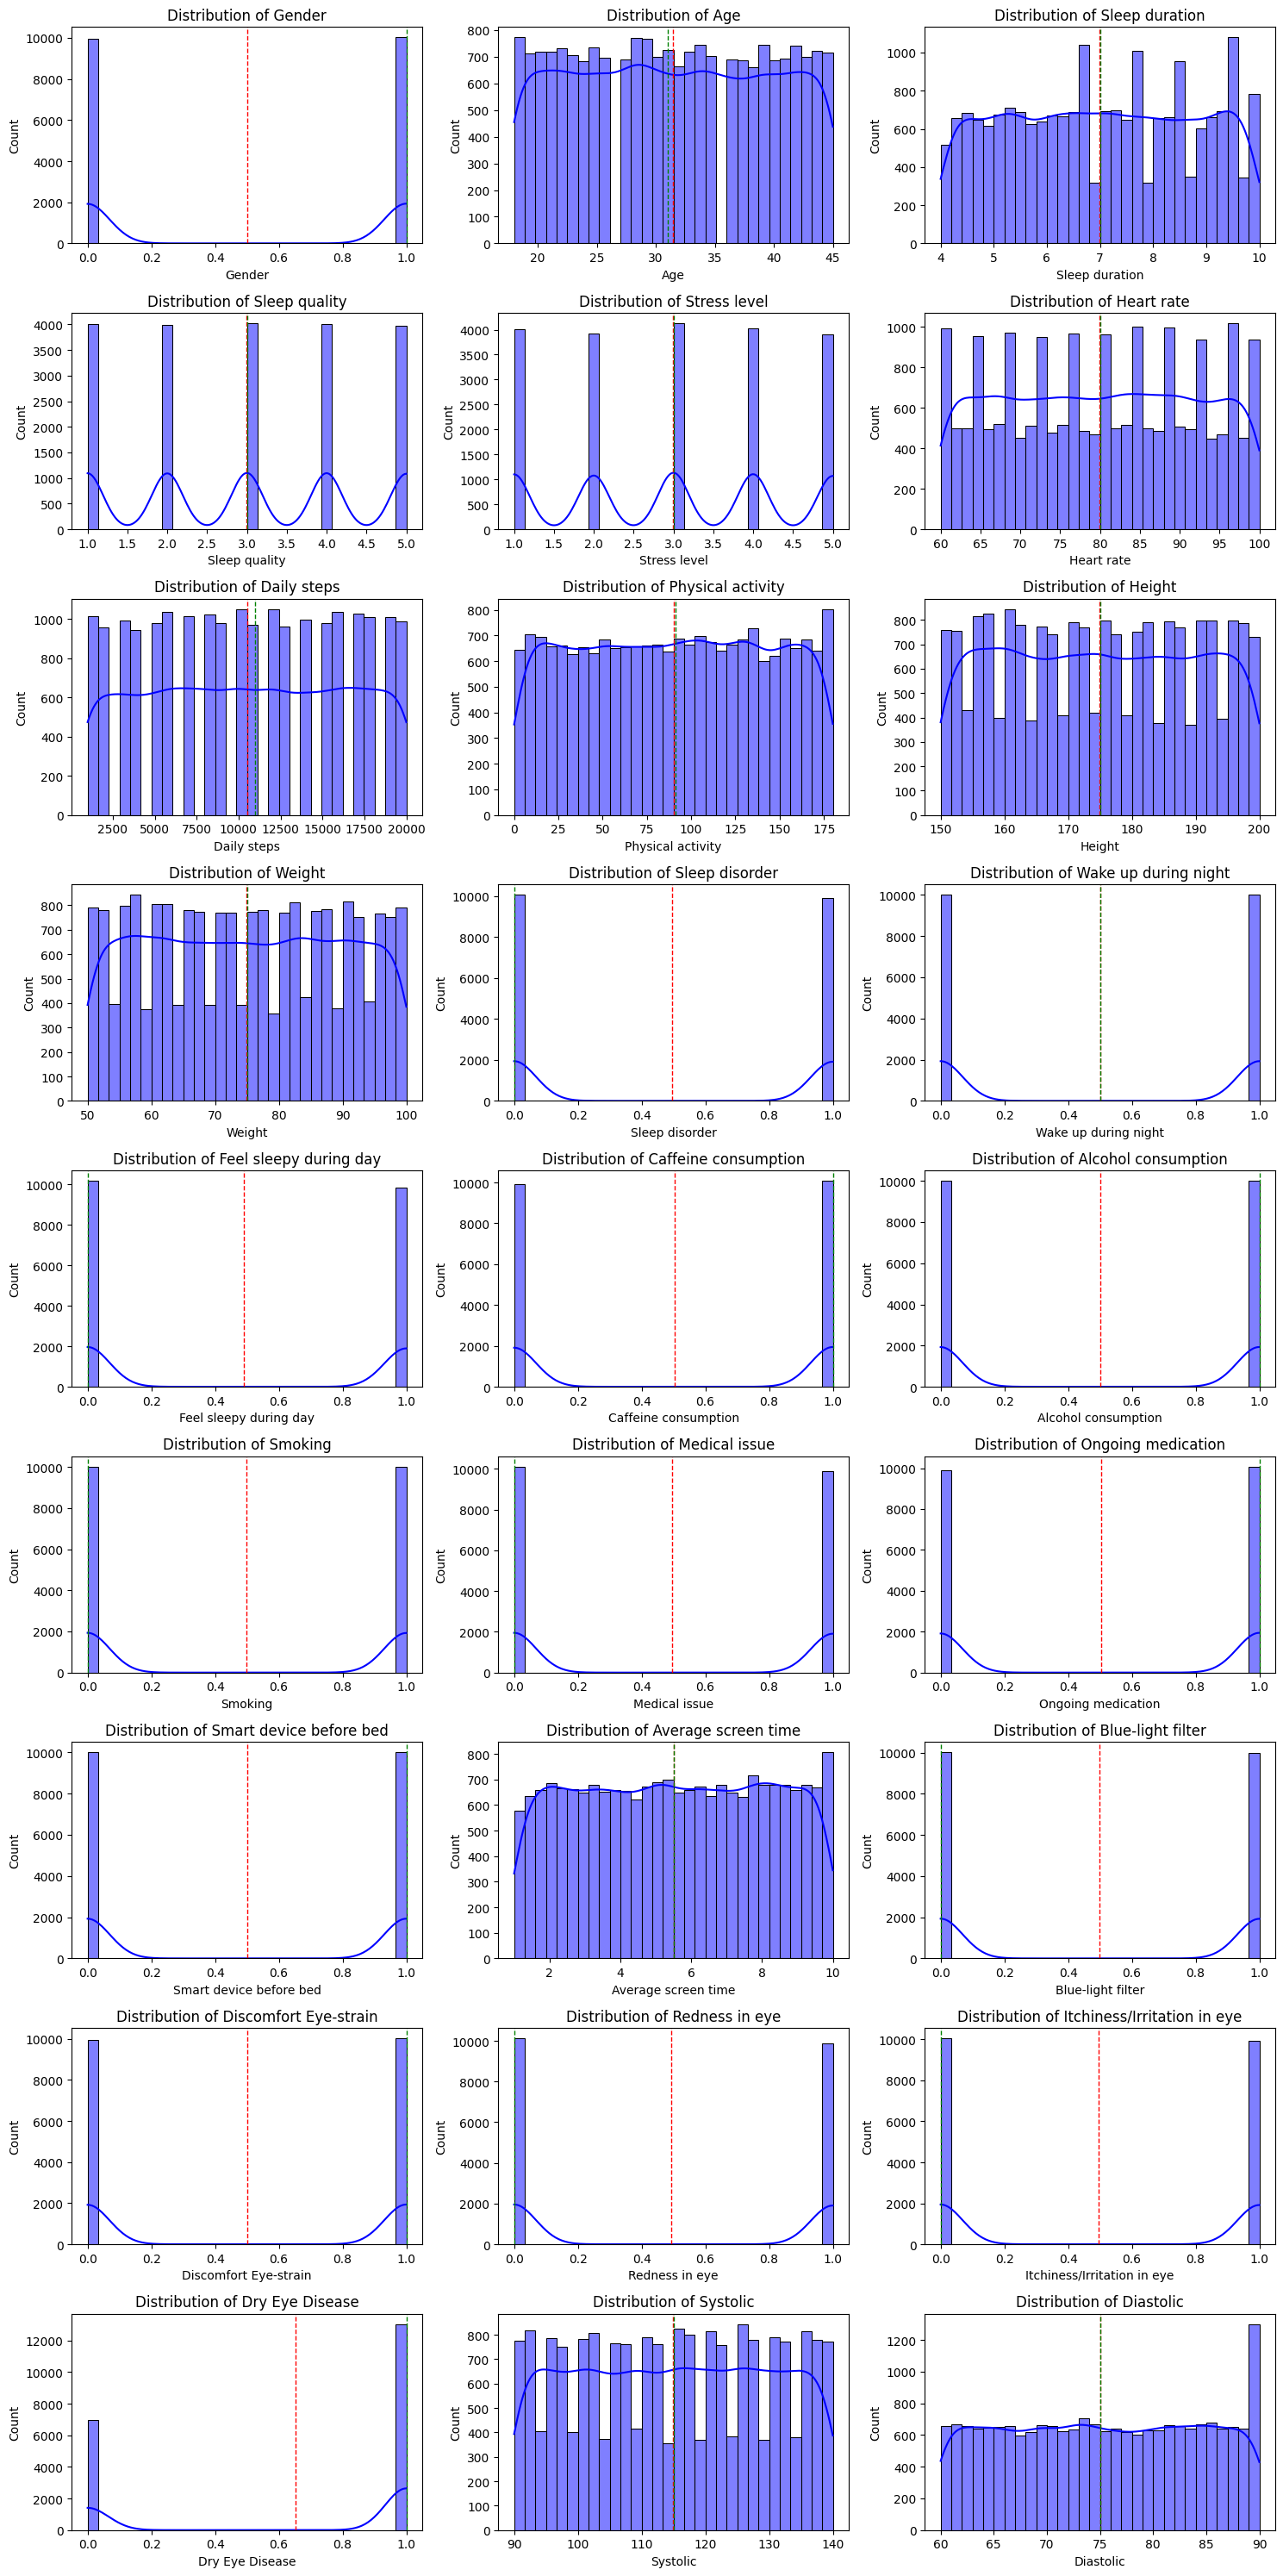

In [ ]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric_cols[:27], 1):
    plt.subplot(9, 3, i)
    sns.histplot(dry_eye_ds[col], kde=True, bins=30, color="blue")
    plt.axvline(dry_eye_ds[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(dry_eye_ds[col].median(), color='green', linestyle='dashed', linewidth=1)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

> **Conclusion:**
>
> 1. **Gender** appears to be distributed equally between Male and Female.
>
> 2. **Age** appears to be faily uniform with a slight consentration around the mean age of 31 years.
>
> 3. **Sleep Duration** appears to have a normal distribution, with mean of 7 hours which is considered as a healthy sleep duration.
>
> 4. **Sleep Quality** shows an even distribution, indicates a diverse set of response.
>
> 5. **Stress Level** shows an even distribution, indicates a diverse set of response.
>
> 6. **Heart Rate** shows mean of 80 beats per minute.
>
> 7. **Daily Steps** shows mean around 10500 steps and median around 11000. 
> 
> 8. **Physical Activity** shows mean around 90 and median around 11000 activities. 
> 
> 9. **Height** looks normal, with mean values around 175 cm.
> 
> 10. **Weight** appears normal, with mean values around 75 kg.
>
> 11. **Sleep Disorder** shows that the data has equal distribution between 2 conditions.
>
> 12. **Wake up during night** shows the data has equal distribution between 2 conditions.
>
> 13. **Feel sleepy during day** shows the data has equal distribution between 2 conditions.
>
> 14. **Caffeine Consumption** shows the data has equal distribution between 2 conditions.
>
> 15. **Alcohol Consumtion** shows the data has equal distribution between 2 conditions.
>
> 16. **Smoking** shows the data has equal distribution between 2 conditions.
>
> 17. **Medical Issue** shows the data has equal distribution between 2 conditions.
>
> 18. **Ongoing Medication** shows the data has equal distribution between 2 conditions.
>
> 19. **Smart device before bed** shows the data has equal distribution between 2 conditions.
>
> 20. **Average Screen Time** appears to be slightly skewed to the right, most of people have 5.5 hours of screen time per day.
>
> 21. **Blue-light filter** shows the data has equal distribution between 2 conditions.
>
> 22. **Discomfort Eye-stain** shows the data has equal distribution between 2 conditions.
>
> 23. **Redness in eye shows** the data has equal distribution between 2 conditions.
>
> 24. **Itchiness/Irritation** in eye shows the data has equal distribution between 2 conditions.
>
> 25. **Dry Eye Disease** shows people with the disease represent double in number compared to people with no disease.
>
> 26. **Systolic** shows a roughly uniform spread and some fluctuations, the Kernel Density Estimation curve for smooth trend visualization.
>
> 27. **Diastolic** Appears more evenly distributed, though with a noticeable peak at the higher end, KDE highlights density trends.

> Overall, everything seems to be distributed normally.


### Conclusion

> **Conclusion**
>
> During the predictive analysis, it appeared that there is no correlation between variables. Therefore we will use machine learning models that can capture non-linear relationships.
> 
> **List of consideration:** 
>   1. **Decision Trees and Ensemble Methods:**
>       - **Decision Trees**: Can capture non-linear relationship and interactions between features.
>       - **Random forests**: An ensemble of decision trees that improves performance and reduces overfitting.
>       - **Gradient Boosting Machines (GBM)**: Builds trees sequentially to correct errors of the previous trees.
>       - **XBoost, LightGBM, CatBoost**: Advanced implementations of gradient boosting that are highly efficient and often perform well on structured data.
>   2. **Support Vector Machines (SVM)**
>       - **SVM with Non-linear Kernels**: Use kernels like RBF (Radial Basis Function) to capture non-linear relationships.
>   3. **Neural Networks**
>       - **Multi-layer Perceptrons (MLP)**: Can model complex non-linear relationships with multiple hidden layers.
>       - **Convolutional Neural Networks (CNN)**: Effective for image data.
>       - **Recurrent Neural Networks (RNN)**: Effective for sequential data.
>   4. **Clustering Algorithms**
>       - **K-Means Clustering**: Useful for unsupervised learning to identify patterns and group similar data points.
>       - **DBSCAN**: Density-based clustering that can find arbitrarily shaped clusters and handle noise.


## Predictive Analysis

### Feature Selection

### Model Training